# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [175]:
import numpy as np
import matplotlib.pyplot as plt

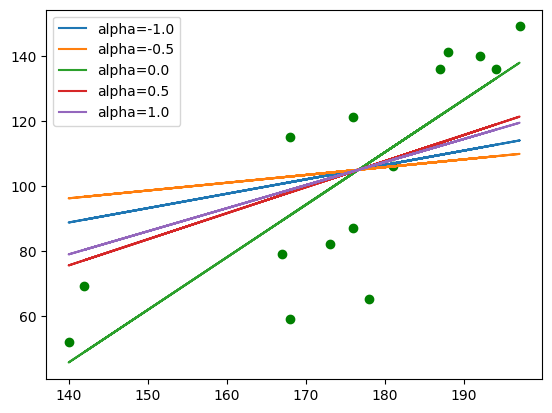

In [176]:
x_ = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)), x_])

I = np.identity(2)
alphas = [-1.0, -0.5, 0.0, 0.5, 1.0] # change here
# add 1-3 line of code here
plt.scatter(x_, y, color='g')
for lr in alphas:
    w = np.linalg.inv(x.T*x + lr * I)*x.T*y
    w=w.ravel()
    plt.plot(x_, [xin*w[0,1]+w[0,0] for xin in x_], label=f"alpha={lr}")

# add 1-3 lines to compare the results
plt.legend()
plt.show()



## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [177]:
import numpy as np

def sgd(x, y, lr=0.1, epochs=100):
    row, col = x.shape
    w = np.ones(col)
    b = 1
    
    for _ in range(epochs):
        y_pred = x * w + b
        diff = y - y_pred
        
        grad_w = -2 * sum(x * diff) / np.linalg.norm(x) ** 2
        grad_b = -2 * sum(diff) / y.size 
        
        w -= lr * grad_w
        b -= lr * grad_b
    
    return b, w


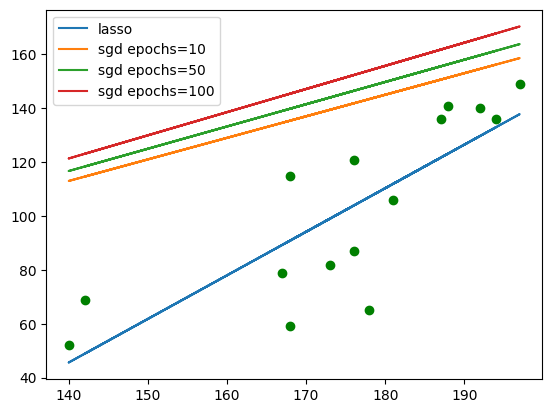

In [178]:
from sklearn.linear_model import Lasso

x_ = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15, 1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15, 1)

x = np.asarray(np.c_[np.ones((15, 1)), x_])

I = np.identity(2)
alpha = 0.1


plt.scatter(x_, y, color='g')

lasso_regression = Lasso(alpha)
lasso_regression.fit(x_, y)
plt.plot(x_, lasso_regression.predict(x_), label="lasso")

b, w = sgd(x, y, alpha, 10)
plt.plot(x_, np.dot(x, w), label="sgd epochs=10")

b, w = sgd(x, y, alpha, 50)
plt.plot(x_, np.dot(x, w), label="sgd epochs=50")

b, w = sgd(x, y, alpha, 100)
plt.plot(x_, np.dot(x, w), label="sgd epochs=100")

plt.legend()
plt.show()

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

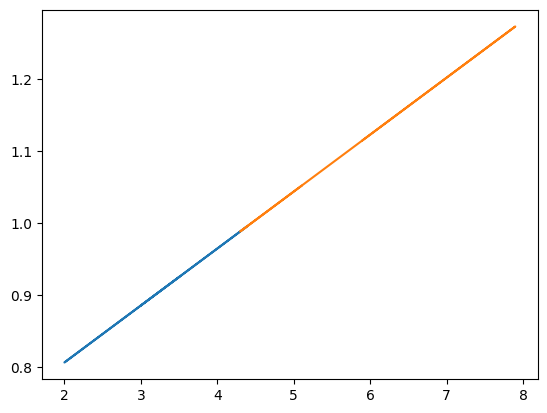

,0,1
0,0.924785,1.051418
1,0.885212,1.035589
2,0.901042,1.019760
3,0.893127,1.011845
4,0.932700,1.043504
...,...,...
145,0.885212,1.178051
146,0.845640,1.146393
147,0.885212,1.162222
148,0.916871,1.138479


In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

x = iris_df[['sepal width (cm)','sepal length (cm)']].values
y = iris_data.target.reshape(-1, 1)

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b
plt.plot(x, y_pred)
plt.show()

df = pd.DataFrame(y_pred)
df